## MSCA 31009 Machine Learning & Predictive Analytics
## Assignment 4
## Duo Zhou

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics as skm
from sklearn.model_selection import train_test_split

## Boosting and Classification:

Data: The data we will use has been taken from here: https://archive.ics.uci.edu/ml/datasets/Adult (Links to an external site.)

There will be some basic preprocessing work to do, some of which is outlined. But please post on Canvas as questions arise. The goal of this homework is to take census data and predict whether an individual would have an income that exceeds $50k/yr. This is a binary classification problem.



### 1. Data Processing

a) Import the data from the website directly: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data (Links to an external site.)

We can use pandas to read the data that is stored in csv format. Please note there is no header, so we will build column names in a later step. Also, we are going to remove leading white spaces (which just make things tough later)

In [32]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None, skipinitialspace=True)

b) There is no header included, but information on column names is here: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names (Links to an external site.)

Scroll to the bottom of that link to see the explanation of the columns. You need to build the column names for your dataframe. It is highly encouraged to not include spaces in column names. Finally, call your target variable (the last column of ">50K" or "<=50k") "salary".

An easy way to do this is to build a list of column names, and pass those into the .columns() attribute.

Example below:

list_of_columns = ["column_a", "column_b", "column_c"]
my_dataframe.columns = list_of_columns
Resource: https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

In [33]:
cols = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital_status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_per_week',
    'native_country',
    'salary'
]

df.columns = cols

c) Check your dataframe shape to verify that you have the correct # of rows and columns. Run the following command:

adult_df.shape
You should get a shape of: (32561, 15)

In [34]:
df.shape

(32561, 15)

d) Drop the 3rd column from the data (it is referred to as "fnlwgt" on UCI's website and is not necessary in this homework)

e) Note: There are random values of  '?' that show up in the data - this is fine! These just refer to "unknown" and can be left as is. This data has no true NA values, so no need to check.

f) Use the .replace() method to make the following changes to the "salary" column:

 "<=50K" should become 0
">50K" should become 1
Note: This step is essential to calculate the ROC_AUC score in model evaluation steps.

Resource: https://stackoverflow.com/questions/51672709/converting-no-and-yes-into-0-and-1-in-pandas-dataframe

In [35]:
# drop "fnlwgt"
df.drop(columns='fnlwgt', inplace=True)

# Revalue the target variable
df.salary.replace({'<=50K':0, '>50K':1}, inplace=True)

In [36]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


g) Create your X dataframe (just your predictors). It should include every feature except for the target variable which is "salary".

You should have the following shape: (32561, 13)

h) Create your y dataframe (just your target variable). It should only be "salary".

You should have the following shape: (32561, )

The values should only be 0 and 1.

In [37]:
X = df.drop(columns='salary')
y = df.salary
print(X.shape)
print(y.shape)

(32561, 13)
(32561,)


i) For this homework we will try converting columns with factors to separate columns (i.e. one-hot encoding). It is not necessary for trees, but can be a very powerful tool to use. There are a variety of ways to do this, but we can use Pandas built-in method .get_dummies(). Pandas will automatically split out columns that are categorical. For now, just run across your full X dataframe.

X_encoded = pd.get_dummies(X)
Your updated X dataframe should have the following shape: (32561, 107)

In [38]:
X_encoded = pd.get_dummies(X)
X_encoded.shape

(32561, 107)

j) Split data into train / test set using an 70/30 split. Verify that you have the same number of columns in your X_train and X_test.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=12345)

print(X_train.shape)
print(X_test.shape)

(22792, 107)
(9769, 107)


### 2. Random Forest Classifier - Base Model:

Start by creating a simple Random Forest only using default parameters - this will let us compare Boosting methods to Random Forest in binary classification problems.

a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.

b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

d) Calculate the AUC score (we did this in HW #4 many times).

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
# Note I use the default hyperparameters in random forest as a base model
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_test_rf_pred  = rf.predict(X_test)
y_test_rf_proba = rf.predict_proba(X_test)

print("Random Forest Test Score:", rf.score(X_test, y_test))
print("Random Forest Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_rf_pred))
print("\nRandom Forest Test Classification Report")
print(skm.classification_report(y_test, y_test_rf_pred))
print("\nRandom Forest Test ROC AUC")
print(skm.roc_auc_score(y_test, y_test_rf_proba[:,1]))

C:\Users\zd000\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Test Score: 0.8393899068481933
Random Forest Test Confusion Matrix
[[6803  629]
 [ 940 1397]]

Random Forest Test Classification Report
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7432
           1       0.69      0.60      0.64      2337

    accuracy                           0.84      9769
   macro avg       0.78      0.76      0.77      9769
weighted avg       0.83      0.84      0.84      9769


Random Forest Test ROC AUC
0.8671592341667


e) Identify the top 5 features. Feel free to print a list OR to make a plot.

Text(0, 0.5, 'Feature Importance')

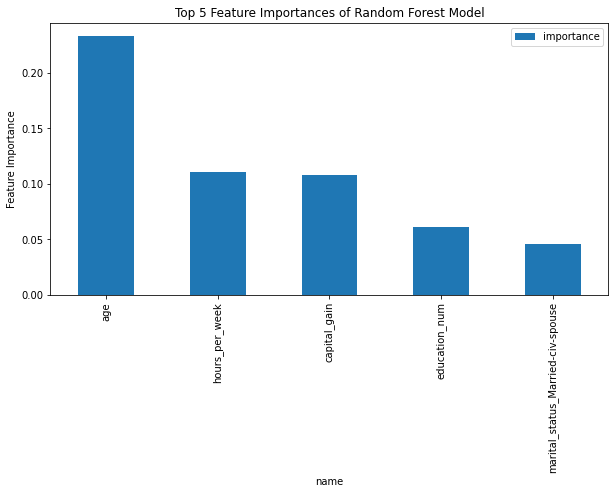

In [42]:
fi = pd.DataFrame({'name': X_test.columns, 'importance': rf.feature_importances_})
fi = fi.sort_values('importance', ascending=False).head(5)
fiplot = fi.plot.bar(x='name', y='importance',title='Top 5 Feature Importances of Random Forest Model',figsize=(10,5))
fiplot.set_ylabel('Feature Importance')

f) Using the model from part B, predict for the train data. Look at the classification report for the train data - is there overfitting for the RandomForest model happening?

In [43]:
y_train_rf_pred  = rf.predict(X_train)
y_train_rf_proba = rf.predict_proba(X_train)

print("Random Forest Train Score:", rf.score(X_train, y_train))
print("\nRandom Forest Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_rf_pred))
print("\nRandom Forest Train Classification Report")
print(skm.classification_report(y_train, y_train_rf_pred))
print("\nRandom Forest Train ROC AUC")
print(skm.roc_auc_score(y_train, y_train_rf_proba[:,1]))
print("")

Random Forest Train Score: 0.9707353457353457

Random Forest Train Confusion Matrix
[[17086   202]
 [  465  5039]]

Random Forest Train Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     17288
           1       0.96      0.92      0.94      5504

    accuracy                           0.97     22792
   macro avg       0.97      0.95      0.96     22792
weighted avg       0.97      0.97      0.97     22792


Random Forest Train ROC AUC
0.995885758991988



The overall accuracy is 0.97 for training set and 0.84 for test set. The training ROC AUC score is 0.996 and test ROC AUC score is 0.87. Both scores are very close to 1 in the training set, but drop drastically in the test set. This is a clear sign of overfitting since the model performance droped a lot when applied to new unseen data.

### 3. AdaBoost Classifier - GridSearch:

Start by creating a simple AdaBoostClassifier only using default parameters.

(Note: sklearn defaults to a max_depth of 1 for AdaBoost. Read more in the documentation: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html (Links to an external site.)).

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

a) Use the AdaBoostClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following:

n_estimators: 100, 200, 300, 400

learning_rate: 0.2,0.4,0.6,0.8,1, 1.2

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

This run took 8 minutes for your TA.

In [16]:

parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2,0.4,0.6,0.8,1, 1.2],
    'random_state' : [12345]
}

abc = AdaBoostClassifier()

grid_search_ab = GridSearchCV(abc, parameters, cv=5, scoring='roc_auc',refit=True, n_jobs=-1, verbose=1)

grid_search_ab.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  5.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1, 1.2],
                         'n_estimators': [100, 200, 300, 400],
                         'random_state': [12345]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [46]:
ab_best=grid_search_ab.best_estimator_
ab_best

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.2,
                   n_estimators=300, random_state=12345)

b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

d) Calculate the AUC score

In [47]:
y_test_ab_pred  = ab_best.predict(X_test)
y_test_ab_proba = ab_best.predict_proba(X_test)

print("AdaBoost Test Score:", ab_best.score(X_test, y_test))
print("\nAdaBoost Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_ab_pred))
print("\nAdaBoost Test Classification Report")
print(skm.classification_report(y_test, y_test_ab_pred))
print("\nAdaBoost Test ROC AUC")
print(skm.roc_auc_score(y_test, y_test_ab_proba[:,1]))
print("")

AdaBoost Test Score: 0.8699969290613164

AdaBoost Test Confusion Matrix
[[6982  450]
 [ 820 1517]]

AdaBoost Test Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7432
           1       0.77      0.65      0.70      2337

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769


AdaBoost Test ROC AUC
0.9274579608792519



e) Identify the top 5 features. Feel free to print a list OR to make a plot.

Text(0, 0.5, 'Feature Importance')

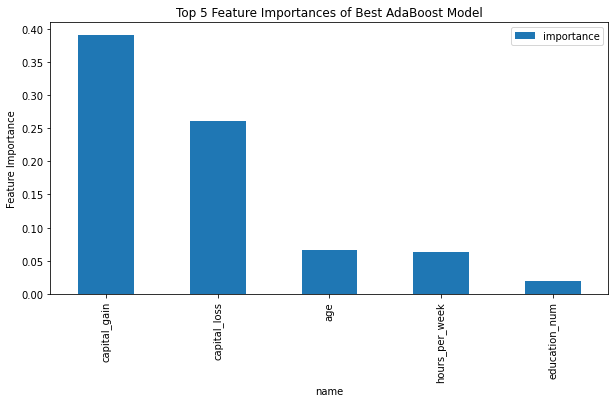

In [48]:
fi1 = pd.DataFrame({'name': X_test.columns, 'importance': ab_best.feature_importances_})
fi1 = fi1.sort_values('importance', ascending=False).head(5)
fiplot1 = fi1.plot.bar(x='name', y='importance',title='Top 5 Feature Importances of Best AdaBoost Model',figsize=(10,5))
fiplot1.set_ylabel('Feature Importance')

f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [49]:
y_train_ab_pred  = ab_best.predict(X_train)
y_train_ab_proba = ab_best.predict_proba(X_train)

print("AdaBoost Train Score:", ab_best.score(X_train, y_train))
print("\nAdaBoost Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_ab_pred))
print("\nAdaBoost Train Classification Report")
print(skm.classification_report(y_train, y_train_ab_pred))
print("\nAdaBoost Train ROC AUC")
print(skm.roc_auc_score(y_train, y_train_ab_proba[:,1]))
print("")

AdaBoost Train Score: 0.8717093717093717

AdaBoost Train Confusion Matrix
[[16283  1005]
 [ 1919  3585]]

AdaBoost Train Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     17288
           1       0.78      0.65      0.71      5504

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.81     22792
weighted avg       0.87      0.87      0.87     22792


AdaBoost Train ROC AUC
0.9290568955613788



The overall accuracy is 0.87 for training set and 0.87 for test set. The training ROC AUC score is 0.929 and test ROC AUC score is 0.927. Both scores barely changed from train to test. There is no overfitting, because the model performance did not change when applied to new unseen data.

### 4. Gradient Boosting Classifier - GridSearch:

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

a) Use GradientBoostingClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following hyperparameters:

n_estimators: 100,200, 300 & 400

learning_rate: choose 3 learning rates of your choice

max_depth: 1, 2 (you can try deeper, but remember part of the value of boosting stems from minimal complexity of trees)
Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and for scoring use "roc_auc" (this is the score that will be referenced when identifying the best parameters).

This run took 6.5 minutes for your TA.

In [51]:
parameters = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.2,0.8,1.2],
    'max_depth': [1,2],
    'random_state' : [12345]
}

gb = GradientBoostingClassifier()

grid_search_gb = GridSearchCV(gb, parameters, cv=5, scoring='roc_auc',refit=True, n_jobs=-1, verbose=1)

grid_search_gb.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [52]:
gb_best = grid_search_gb.best_estimator_
gb_best

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='auto',
                           random_state=12345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

b) Use the best estimator from GridSearchCV to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

c) Calculate the confusion matrix and classification report (both are in sklearn.metrics).

d) Calculate the AUC score

In [53]:
y_test_gb_pred  = gb_best.predict(X_test)
y_test_gb_proba = gb_best.predict_proba(X_test)

print("Gradient Boosting Test Score:", gb_best.score(X_test, y_test))
print("Gradient Boosting Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_gb_pred))
print("\nGradient Boosting Test Classification Report")
print(skm.classification_report(y_test, y_test_gb_pred))
print("\nGradient Boosting Test ROC AUC")
print(skm.roc_auc_score(y_test, y_test_gb_proba[:,1]))
print("")

Gradient Boosting Test Score: 0.8703040229296755
Gradient Boosting Test Confusion Matrix
[[6989  443]
 [ 824 1513]]

Gradient Boosting Test Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      7432
           1       0.77      0.65      0.70      2337

    accuracy                           0.87      9769
   macro avg       0.83      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769


Gradient Boosting Test ROC AUC
0.9294407074289994



e) Identify the top 5 features. Feel free to print a list OR to make a plot.

Text(0, 0.5, 'Feature Importance')

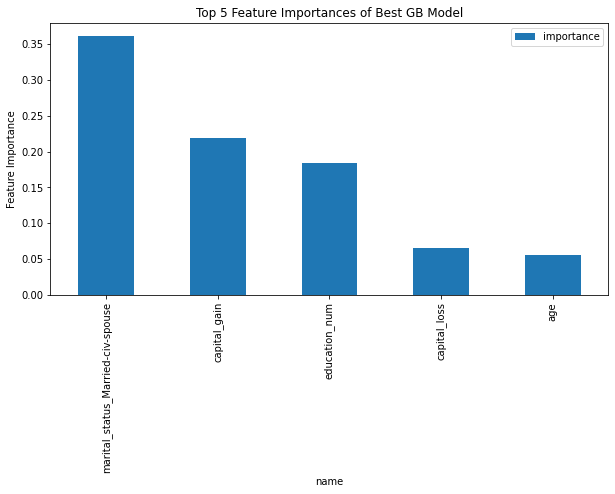

In [54]:
fi2 = pd.DataFrame({'name': X_test.columns, 'importance': gb_best.feature_importances_})
fi2 = fi2.sort_values('importance', ascending=False).head(5)
fiplot2 = fi2.plot.bar(x='name', y='importance',title='Top 5 Feature Importances of Best GB Model',figsize=(10,5))
fiplot2.set_ylabel('Feature Importance')

f) Using the model from part (b), predict for the train data. Look at the classification report for the train data - is there overfitting for the best estimator?

In [55]:
y_train_gb_pred  = gb_best.predict(X_train)
y_train_gb_proba = gb_best.predict_proba(X_train)

print("Gradient Boosting Train Score:", gb_best.score(X_train, y_train))
print("Gradient Boosting Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_gb_pred))
print("\nGradient Boosting Train Classification Report")
print(skm.classification_report(y_train, y_train_gb_pred))
print("\Gradient Boosting Train ROC AUC")
print(skm.roc_auc_score(y_train, y_train_gb_proba[:,1]))
print("")

Gradient Boosting Train Score: 0.8798262548262549
Gradient Boosting Train Confusion Matrix
[[16394   894]
 [ 1845  3659]]

Gradient Boosting Train Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     17288
           1       0.80      0.66      0.73      5504

    accuracy                           0.88     22792
   macro avg       0.85      0.81      0.83     22792
weighted avg       0.88      0.88      0.88     22792

\Gradient Boosting Train ROC AUC
0.9370223174530257



The overall accuracy is 0.88 for training set and 0.87 for test set. The training ROC AUC score is 0.937 and test ROC AUC score is 0.929. Both scores barely changed from train to test. There is no overfitting, because the model performance did not change when applied to new unseen data.

### 5. XGBoost - RandomizedSearchCV

In [21]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

Repeat 4(a) - 4(f) with xgboost and RandomizedSearchCV.

For 4a use the following parameters: 

n_estimators: 100-1000 in increments of 50  (i.e. 100,150,200,.....1000)

learning_rate: 0.1 - 1.6 in increments of 0.1

max_depth: 1, 2

gamma: 0 - 5 in increments of 0.25

Note: For parameters with increments please don't feel the need to type each value by hand. There are better ways to handle this. Post in discussion thread if you are struggling.

For RandomizedSearchCV make sure to still use cv = 5 and for scoring use "roc_auc".

In [22]:
parameters = {
    'n_estimators': list(np.arange(100, 1050, 50)),
    'learning_rate': list(np.arange(0.1, 1.7, 0.1)),
    'max_depth': [1,2],
    'gamma': list(np.arange(0, 5.25, 0.25)),
    'random_state' : [12345]
}

xgbc = xgb.XGBClassifier()

grid_search_xgb = RandomizedSearchCV(xgbc, parameters, cv=5, scoring='roc_auc',refit=True, n_jobs=-1, verbose=1)

grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_co...
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0, 1.1,
                                                          1.20000000

In [23]:
xgb_best = grid_search_xgb.best_estimator_
xgb_best

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1.3000000000000003, max_delta_step=0, max_depth=1,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=950, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=12345, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_test_xgb_pred  = xgb_best.predict(X_test)
y_test_xgb_proba = xgb_best.predict_proba(X_test)

print("XGB Test Score:", xgb_best.score(X_test, y_test))
print("XGB Test Confusion Matrix")
print(skm.confusion_matrix(y_test, y_test_xgb_pred))
print("\nXGB Test Classification Report")
print(skm.classification_report(y_test, y_test_xgb_pred))
print("\XGB Test ROC AUC")
print(skm.roc_auc_score(y_test, y_test_xgb_proba[:,1]))
print("")

XGB Test Score: 0.8716347630258983
XGB Test Confusion Matrix
[[6997  435]
 [ 819 1518]]

XGB Test Classification Report
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7432
           1       0.78      0.65      0.71      2337

    accuracy                           0.87      9769
   macro avg       0.84      0.80      0.81      9769
weighted avg       0.87      0.87      0.87      9769

\XGB Test ROC AUC
0.9295670850312265



Text(0, 0.5, 'Feature Importance')

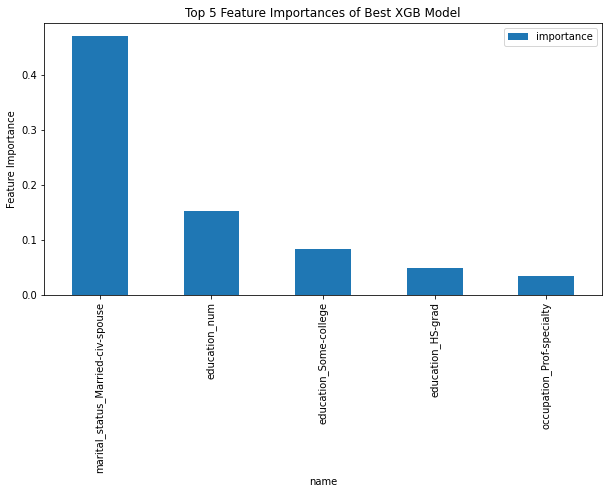

In [26]:
fi3 = pd.DataFrame({'name': X_test.columns, 'importance': xgb_best.feature_importances_})
fi3 = fi3.sort_values('importance', ascending=False).head(5)
fiplot3 = fi3.plot.bar(x='name', y='importance',title='Top 5 Feature Importances of Best XGB Model',figsize=(10,5))
fiplot3.set_ylabel('Feature Importance')

In [25]:
y_train_xgb_pred  = xgb_best.predict(X_train)
y_train_xgb_proba = xgb_best.predict_proba(X_train)

print("XGB Train Score:", xgb_best.score(X_train, y_train))
print("XGB Train Confusion Matrix")
print(skm.confusion_matrix(y_train, y_train_xgb_pred))
print("\nXGB Train Classification Report")
print(skm.classification_report(y_train, y_train_xgb_pred))
print("\nXGB Train ROC AUC")
print(skm.roc_auc_score(y_train, y_train_xgb_proba[:,1]))
print("")

XGB Train Score: 0.8736837486837487
XGB Train Confusion Matrix
[[16327   961]
 [ 1918  3586]]

XGB Train Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92     17288
           1       0.79      0.65      0.71      5504

    accuracy                           0.87     22792
   macro avg       0.84      0.80      0.82     22792
weighted avg       0.87      0.87      0.87     22792


XGB Train ROC AUC
0.9300419128522405



The overall accuracy is 0.874 for training set and 0.872 for test set. The training ROC AUC score is 0.930 and test ROC AUC score is 0.9296. Both scores barely changed from train to test. There is no overfitting, becasue the model performance did not change when applied to new unseen data. Notice that the differences between train and test in both scores are the smallest in the best XGB model. 

### 6. Moving into Conceptual Problems:

#### a) What does the alpha parameter represent in AdaBoost? Please refer to chapter 7 of the Hands-On ML book if you are struggling.

Alpha in AdaBoost is the final weight of each individual weak predictor (i.e. stump,tree) has in the final ensemble model. 
$\alpha_{t}= 0.5*ln((1-\epsilon_{t})/\epsilon_{t})$, where $\epsilon_{t}$ is the error rate of each model. The lower the error rate = the higher the alpha. Alpha is also used to update sample weight of each observation in the next weak predictor. $New sample weight = old sample weight*e^{\alpha}$. The incorrectly classified observations get bigger sample weights in the next weak predictor. 

#### b) In AdaBoost explain how the final predicted class is determined. Be sure to reference the alpha term in your explanation.

Once all the weak predictor are modeled. Alpha of each individual predictor is the weight of prediction. For regressor, the final result is the weighted average of all the predictions, where weights are alphas from weak predictor. For classifier, the final result is whichever class has the biggest sum of weights in all the predictions.  

#### c) In Gradient Boosting, what is the role of the max_depth parameter? Why is it important to tune on this parameter?

Max_depth is the maximum depth of each individual tree (Weak Learner) in the Gradient Boosting model. The point of Gradient Boosting is to combine the results of many weak learners using residuals and learning rate to produce the final result. Weak Learners with higher depth learn relations very specific to the training sample, which can lead to overfitting. Tuning this parameter is crucial in preventing overfitting.  

#### d) In Part (e) of Steps 2-5 you determined the top 5 predictors across each model. Do any predictors show up in the top 5 predictors for all three models? If so, comment on if this predictor makes sense given what you are attempting to predict. (Note: If you don't have any predictors showing up across all 3 predictors, explain one that shows up in 2 of them).

Education_num appeared in the top 5 predictors for all models. It makes sense that people with more years of education tend to have higher salary.

#### e) From the models run in steps 2-5, which performs the best based on the Classification Report? Support your reasoning with evidence from your test data and be sure to share the optimal hyperparameters found from your grid search.

Based on the test data classfication report, the overall accuracy is 0.872 for XGB best model, which is the highest among all models in this assignment. The best XGB model also has the highest test ROC AUC score of 0.9296. We can say that the XGB model performs best. Notice that there is not much difference in performance among Adaboost, GB and XGB. Their overall f1-scores and ROC AUC scores are very similar.  
Best XGB model optimal hyperparameters :

base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1, gamma=0.5, learning_rate=1.3000000000000003, max_delta_step=0, max_depth=1, min_child_weight=1, n_estimators=950, n_jobs=0, num_parallel_tree=1, reg_alpha=0,reg_lambda=1, scale_pos_weight=1, subsample=1

#### f) For your best performing model, plot out a ROC curve using your test data. Feel free to use sklearn, matplotlib or any other method in python. Describe what the x-axis & y-axis of the ROC curve tell us about a classifier.




Text(0.5, 0, 'False Positive Rate')

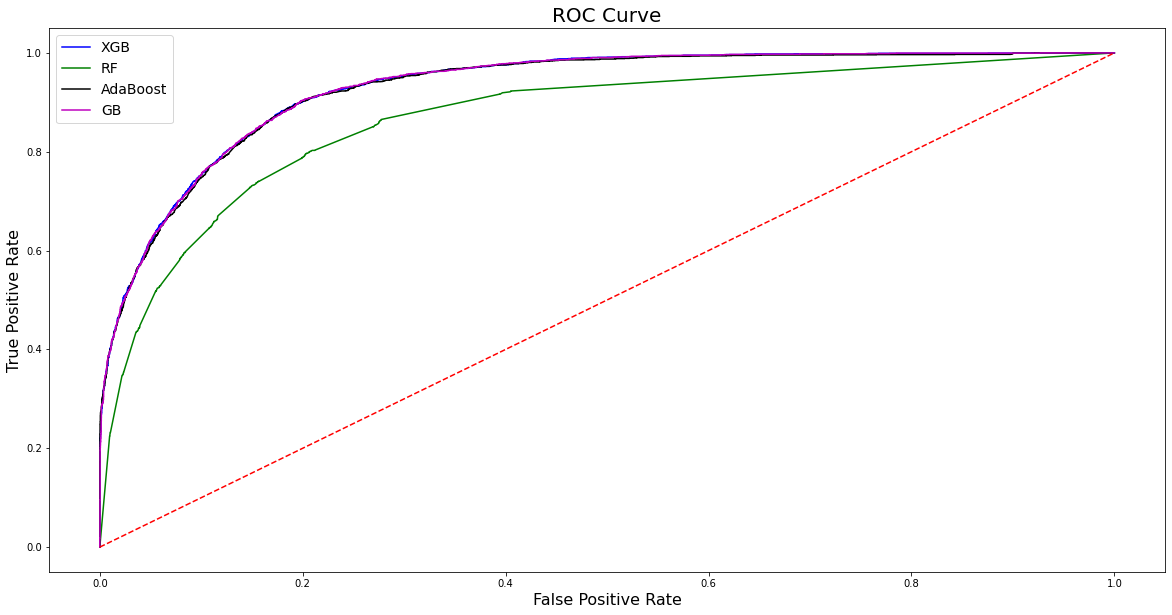

In [79]:
fpr, tpr, threshold = skm.roc_curve(y_test, y_test_xgb_proba[:,1])
fpr1, tpr1, threshold1 = skm.roc_curve(y_test, y_test_rf_proba[:,1])
fpr2, tpr2, threshold2 = skm.roc_curve(y_test, y_test_ab_proba[:,1])
fpr3, tpr3, threshold3 = skm.roc_curve(y_test, y_test_gb_proba[:,1])
roc_auc = skm.auc(fpr, tpr)


plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, '-b',label ='XGB')
plt.plot(fpr1, tpr1, '-g',label ='RF')
plt.plot(fpr2, tpr2, '-k',label ='AdaBoost')
plt.plot(fpr3, tpr3, '-m',label ='GB')
plt.legend(fontsize=14)
plt.title('ROC Curve', fontsize=20)
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)

The X-axis represents the flase positive rate (FP), which is the percentage of 0s that were incorrectly predicted as 1s. The Y-axis represents the true positive rate(TP), which is the percentage of 1s that were correctly predicted. The ROC curve plots TP vs. FP over all possible thresholds for classification. The best threshold to produce the optimal confusion matrix is the one that generated the most upper left point on the ROC curve. The AUC score (Aera Under the Curve) is an indicator of the model performance. The higher the AUC score, the better the model. We can see from the plot above that XGB, Adaboost and GB have very similar ROC&AUC indicating similar model performance. Random Forest has a smaller AUC indicating worse model performance.